In [2]:
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.3.5


In [14]:
!ls -lh ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz

-rwxrwxrwx 1 degulati degulati 1.8G Dec 21 21:13 ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz


There are ~500K variants in this VCF file: 

In [15]:
!zcat ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz | wc -l 

494358


In [21]:
import sys
import numpy as np

Determine the number of alternate alleles: 

In [19]:
filename = 'ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf' 
callset = allel.read_vcf(filename, fields=['numalt'], log=sys.stdout)

[read_vcf] 65536 rows in 9.39s; chunk in 9.39s (6977 rows/s); 22 :22357325
[read_vcf] 131072 rows in 21.12s; chunk in 11.72s (5590 rows/s); 22 :26658368
[read_vcf] 196608 rows in 30.92s; chunk in 9.81s (6682 rows/s); 22 :31630436
[read_vcf] 262144 rows in 43.56s; chunk in 12.64s (5186 rows/s); 22 :36032955
[read_vcf] 327680 rows in 54.88s; chunk in 11.32s (5790 rows/s); 22 :40845796
[read_vcf] 393216 rows in 66.95s; chunk in 12.07s (5428 rows/s); 22 :45421032
[read_vcf] 458752 rows in 76.43s; chunk in 9.48s (6914 rows/s); 22 :49192415
[read_vcf] 494328 rows in 83.91s; chunk in 7.48s (4756 rows/s)
[read_vcf] all done (5891 rows/s)


All variants are bi-allelic:

In [22]:
numalt = callset['variants/numalt']
np.max(numalt)

1

In [63]:
callset = allel.read_vcf(filename, fields='*')


In [64]:
sorted(callset.keys())

['calldata/DS',
 'calldata/GL',
 'calldata/GT',
 'samples',
 'variants/AA',
 'variants/AC',
 'variants/AF',
 'variants/AFR_AF',
 'variants/ALT',
 'variants/AMR_AF',
 'variants/AN',
 'variants/ASN_AF',
 'variants/AVGPOST',
 'variants/CHROM',
 'variants/CIEND',
 'variants/CIPOS',
 'variants/END',
 'variants/ERATE',
 'variants/EUR_AF',
 'variants/FILTER_PASS',
 'variants/HOMLEN',
 'variants/HOMSEQ',
 'variants/ID',
 'variants/LDAF',
 'variants/POS',
 'variants/QUAL',
 'variants/REF',
 'variants/RSQ',
 'variants/SNPSOURCE',
 'variants/SVLEN',
 'variants/SVTYPE',
 'variants/THETA',
 'variants/VT',
 'variants/altlen',
 'variants/is_snp',
 'variants/numalt']

In [5]:
callset['calldata/GT']

array([[[0, 0],
        [0, 1],
        [0, 1],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 1],
        [0, 1],
        [0, 1],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 1],
        [0, 1],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[1, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [1, 0],
        [0, 0]]], dtype=int8)

In [8]:
len(callset['samples'])

1092

In [9]:
callset['variants/CHROM']


array(['22', '22', '22', ..., '22', '22', '22'], dtype=object)

To count the number of heterozygous calls per variant: 

In [ ]:
gt.count_het(axis=1)

array([134, 184, 113, ...,   7,  13, 206])

To count the number of times each allele is observed per variant: 

In [11]:
ac = gt.count_alleles()
ac

<AlleleCountsArray shape=(494328, 2) dtype=int32>
2050  134
2000  184
2071  113
...
2175    9
2171   13
1904  280

In [6]:
gt = allel.GenotypeArray(callset['calldata/GT'])
gt

<GenotypeArray shape=(494328, 1092, 2) dtype=int8>
0/0 0/1 0/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/1 0/1 0/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/1 0/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
1/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 1/0 0/0

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
pos = allel.SortedIndex(callset['variants/POS'])
pos

0,1,2,3,4,...,494323,494324,494325,494326,494327
16050408,16050612,16050678,16050984,16051107,...,51237071,51238249,51240081,51242613,51243297


In [60]:
def plot_windowed_variant_density(pos, window_size, title=None):
    
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    # print(bins)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    # print(x)

    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins) 
    # print(h)
    y = h / window_size
    
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)

The plot of variant density shows how many SNPs (Single Nucleotide Polymorphisms) are present and their distribution along the genome: 

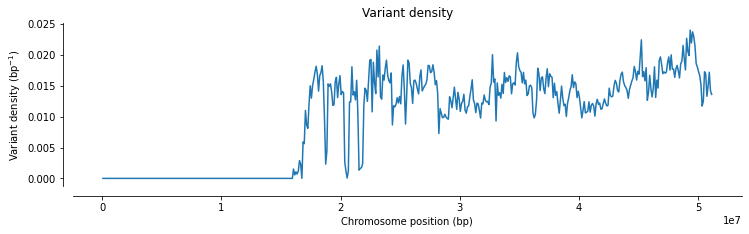

In [61]:
plot_windowed_variant_density(pos, window_size=100000, title='Variant density')

The raw density hovers around 0.02, indicating that a SNP is present every 50 bases of the reference genome. 

In [66]:
callset['variants/DP']
callset['varia']

KeyError: 'variants/DP'

In [ ]:
def plot_variant_hist(f, bins=30):
    # x = variants[f][:]
    x = callset['variants/' + str(f)]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')

Next, we investigate variant quality by examining the Ti/Tv ratio, the number of transitions divided by the number of transversions. This only applies to biallelic variants.

In [97]:
# mutations = 
ref_alleles = callset['variants/REF']
alt_alleles = callset['variants/ALT'][:, 0]
mutations = np.add(ref_alleles, alt_alleles)
mutations

array(['TC', 'CG', 'CT', ..., 'TA', 'AC', 'AT'], dtype=object)

In [101]:
np.equal(mutations, b'AG')

0

In [85]:
def locate_transitions(x):
    x = np.asarray(x)

    # check if any mutations have the following pairs of byte strings
    return (x == b'AG') | (x == b'GA') | (x == b'CT') | (x == b'TC') 

In [92]:
is_ti = locate_transitions(mutations)
is_ti

array([False, False, False, ..., False, False, False])

In [90]:
def ti_tv(x):
    if len(x) == 0:
        return np.nan
    is_ti = locate_transitions(x)
    n_ti = np.count_nonzero(is_ti) # number of transitions
    print(n_ti)
    n_tv = np.count_nonzero(~is_ti) # number of transversions
    if n_tv > 0:
        return n_ti / n_tv
    else:
        return np.nan

In [94]:
ti_tv(mutations)

0


0.0